**Amazon Product Reviews Sentiment Analysis **

Used few million amazon customer reviews dataset from Kaggle[link text](https://www.kaggle.com/bittlingmayer/amazonreviews)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bz2
import os


 **Text File Reading** 
 

In [3]:
trainfile = bz2.BZ2File('/content/drive/MyDrive/train.ft.txt.bz2','r')
lines = trainfile.readlines()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
lines[1]

b"__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n"

**Sentiment Analysis**

In [5]:
docSentimentList=[]
def getDocumentSentimentList(docs,splitStr='__label__'):
    for i in range(len(docs)):
        #print('Processing doc ',i,' of ',len(docs))
        text=str(lines[i])
        #print(text)
        splitText=text.split(splitStr)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        #print('First half:',secHalf[0],'\nsecond half:',secHalf[2:len(secHalf)-1])
        docSentimentList.append([text,sentiment])
    print('Done!!')
    return docSentimentList

In [6]:
docSentimentList=getDocumentSentimentList(lines[:1000000],splitStr='__label__')

Done!!


In [7]:
train_df = pd.DataFrame(docSentimentList,columns=['Text','Sentiment'])
train_df.head()

,Text,Sentiment
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2


 **Word Cloud Generation**

In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
 ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

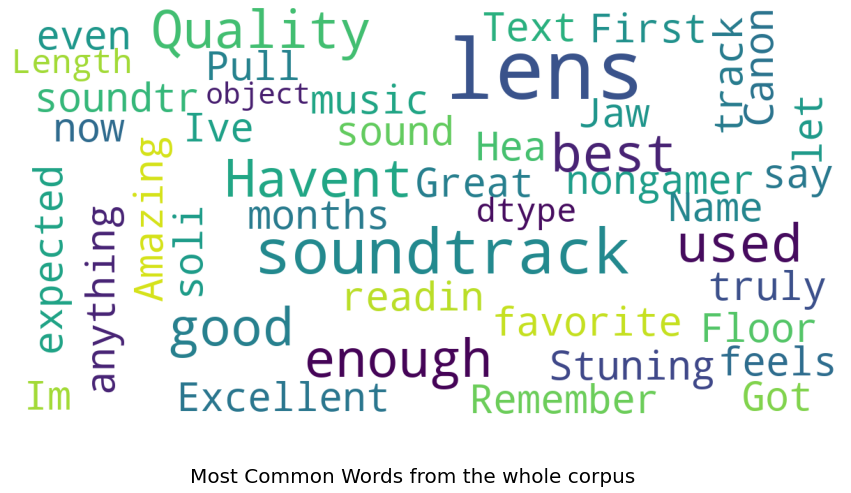

In [68]:
show_wordcloud(train_df['Text'],'Most Common Words from the whole corpus')

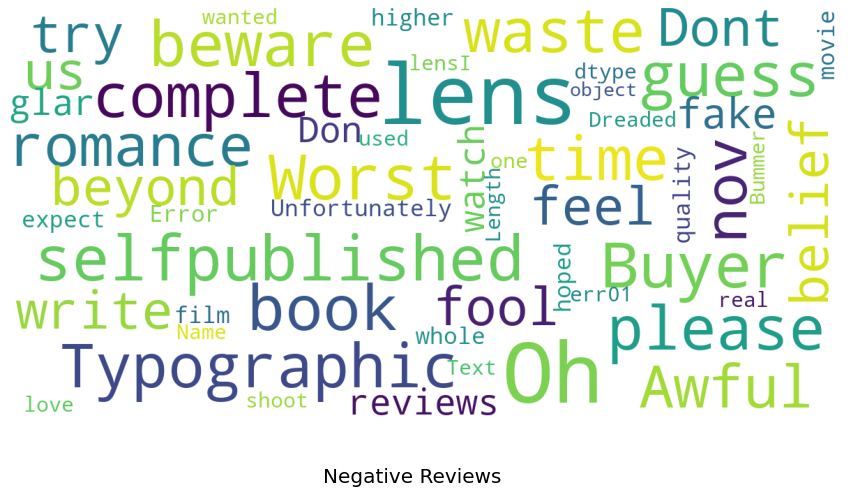

In [70]:
show_wordcloud(train_df[train_df['Sentiment'] == 0]['Text'],'Negative Reviews')

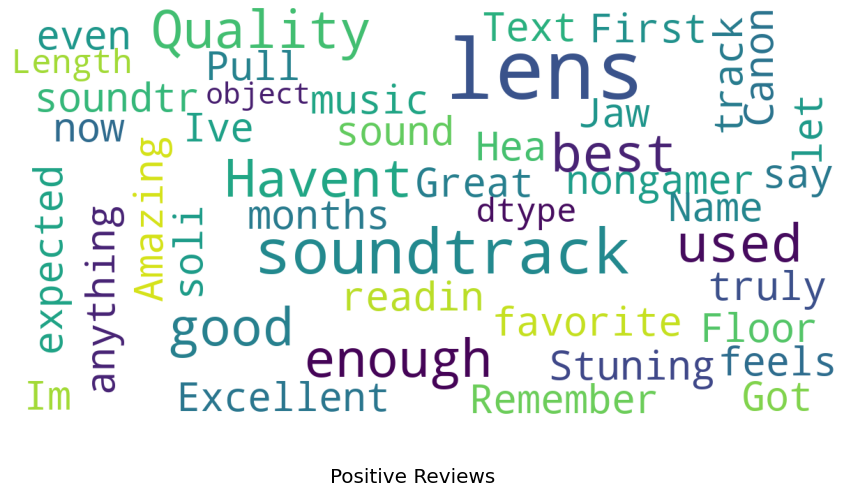

In [71]:
show_wordcloud(train_df[train_df['Sentiment'] == 1]['Text'],'Positive Reviews')

## **Text Preprocessing**##

In [8]:
train_df['Sentiment'][train_df['Sentiment']=='1'] = 0
train_df['Sentiment'][train_df['Sentiment']=='2'] = 1

In [9]:
train_df['Sentiment'].value_counts()

1    505678
0    494322
Name: Sentiment, dtype: int64

In [10]:
train_df['word_count'] = train_df['Text'].str.lower().str.split().apply(len)
train_df.head()

,Text,Sentiment,word_count
0,Stuning even for the non-gamer: This sound tra...,1,80
1,The best soundtrack ever to anything.: I'm rea...,1,97
2,Amazing!: This soundtrack is my favorite music...,1,129
3,Excellent Soundtrack: I truly like this soundt...,1,118
4,"Remember, Pull Your Jaw Off The Floor After He...",1,87


In [13]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [14]:
train_df['Text'] = train_df['Text'].apply(remove_punc)
train_df.shape

(1000000, 3)

In [15]:
train_df.head()

,Text,Sentiment,word_count
0,Stuning even for the nongamer This sound track...,1,80
1,The best soundtrack ever to anything Im readin...,1,97
2,Amazing This soundtrack is my favorite music o...,1,129
3,Excellent Soundtrack I truly like this soundtr...,1,118
4,Remember Pull Your Jaw Off The Floor After Hea...,1,87


In [ ]:
len(train_df['word_count'][train_df['word_count']<=25])

63720

In [16]:
train_df1 = train_df[:][train_df['word_count']<=25]
train_df1.head()

,Text,Sentiment,word_count
44,autumn got this for my daughter in NC she is n...,1,22
58,Hunting the Hard Way Thia was a gift for my Hu...,1,25
77,Smells divine This is my second bottle of shee...,1,25
78,Very disappointed This perfume is just AWFUL S...,0,24
99,Caution These tracks are not the original vers...,0,22


In [17]:
train_df1.head()

,Text,Sentiment,word_count
44,autumn got this for my daughter in NC she is n...,1,22
58,Hunting the Hard Way Thia was a gift for my Hu...,1,25
77,Smells divine This is my second bottle of shee...,1,25
78,Very disappointed This perfume is just AWFUL S...,0,24
99,Caution These tracks are not the original vers...,0,22


In [18]:
train_df1['Sentiment'].value_counts()

1    39932
0    23788
Name: Sentiment, dtype: int64

In [19]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
st_wd = text.ENGLISH_STOP_WORDS
c_vector = CountVectorizer(stop_words = st_wd,min_df=.0001,lowercase=1)
c_vector.fit(train_df1['Text'].values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=1, max_df=1.0, max_features=None, min_df=0.0001,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
word_list = list(c_vector.vocabulary_.keys())
stop_words = list(c_vector.stop_words) 

In [21]:
len(stop_words),len(word_list)

(318, 8915)

In [22]:
def remove_words(raw_sen,stop_words):
    sen = [w for w in raw_sen if w not in stop_words]
    return sen

In [23]:
def reviewEdit(raw_sen_list,stop_words):
    sen_list = []
    for i in range(len(raw_sen_list)):
        raw_sen = raw_sen_list[i].split()
        sen_list.append(remove_words(raw_sen,stop_words))
    return sen_list

In [24]:
sen_list = reviewEdit(list(train_df1['Text']),stop_words)
sen_list

[['autumn',
  'got',
  'daughter',
  'NC',
  'making',
  'prefect',
  'bread',
  'Wish',
  'lived',
  'closer',
  'make',
  'somen'],
 ['Hunting',
  'Hard',
  'Way',
  'Thia',
  'gift',
  'Husband',
  'loved',
  'book',
  'It',
  'arrived',
  'date',
  'told',
  'wouldn'],
 ['Smells',
  'divine',
  'This',
  'second',
  'bottle',
  'sheer',
  'freesia',
  'I',
  'just',
  'love',
  'fragrance',
  'light',
  'delicate',
  'sent',
  'beautiful',
  'like',
  'summer',
  'dayn'],
 ['Very',
  'disappointed',
  'This',
  'perfume',
  'just',
  'AWFUL',
  'Smells',
  'like',
  'freesiaThe',
  'gift',
  'recipient',
  'impressed',
  'The',
  'worst',
  'returnedn'],
 ['Caution',
  'These',
  'tracks',
  'original',
  'versions',
  'rerecorded',
  'versions',
  'So',
  'tracks',
  'remastered',
  'irrelevantn'],
 ['textbook',
  'Book',
  'shipped',
  'quickly',
  'excellent',
  'condition',
  'stated',
  'Easy',
  'transaction',
  'buy',
  'againn'],
 ['great',
  'gift',
  'brother',
  'law',
 

In [25]:
from gensim.models import word2vec
wv_model = word2vec.Word2Vec(sen_list,size=100)

In [26]:
wv_model.wv.syn0.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(14350, 100)

In [27]:
wv_model.wv.most_similar("car")

[('pair', 0.9461026191711426),
 ('house', 0.9303147792816162),
 ('head', 0.929245114326477),
 ('bottle', 0.9274458289146423),
 ('lights', 0.9213662147521973),
 ('worn', 0.9180179834365845),
 ('batteryn', 0.9169451594352722),
 ('wearing', 0.9163036346435547),
 ('boots', 0.9141931533813477),
 ('socks', 0.9136002659797668)]

In [28]:
def fun(sen_list,wv_model):
    word_set = set(wv_model.wv.index2word)
    X = np.zeros([len(sen_list),25,100])
    c = 0
    for sen in sen_list:
        nw=24
        for w in list(reversed(sen)):
            if w in word_set:
                X[c,nw] = wv_model[w]
                nw=nw-1
        c=c+1
    return X

In [43]:
X = fun(sen_list,wv_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [44]:
from sklearn.model_selection import train_test_split
y = train_df1['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
X_train.shape

(57348, 25, 100)

 ## **Keras NN Model** ##

In [46]:
import keras.backend as K
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation,LSTM, SimpleRNN ,GRU , Bidirectional,Input ,Concatenate, Multiply,Lambda,Reshape
input_st  = Input(shape=(25,100))
lstm1 = Bidirectional(GRU(200,input_shape=(25,100),activation='relu',return_sequences=True),merge_mode='mul')(input_st)
lstm2 = Bidirectional(GRU(1,input_shape=(25,100),activation='relu',return_sequences=True),merge_mode='mul')(lstm1)
print(lstm1.shape,' ',lstm2.shape)
lstm2 = Reshape((-1,))(lstm2)
lstm2 = Activation('sigmoid')(lstm2)
lstm2 = Reshape((-1,1))(lstm2)
mult = Multiply()([lstm1,lstm2])

add = Lambda(lambda x: K.sum(x,axis=1))(mult)
dense = Dense(100,activation='relu')(add)
output = Dense(1,activation='sigmoid')(dense)

model = Model(inputs=input_st, outputs=output)
print(model.summary())

(None, 25, 200)   (None, 25, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25, 100)]    0                                            
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 25, 200)      362400      input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 25, 1)        1218        bidirectional_4[0][0]            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 25)           0           bidirectional_5[0][0]            
____________________________________________________________

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [52]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [53]:
hist = model.fit(X_train,y_train,validation_split= 0.1,epochs= 10, batch_size= 512)

Epoch 1/10
101/101 [==============================] - 26s 193ms/step - loss: 0.4240 - accuracy: 0.7799 - val_loss: 0.3129 - val_accuracy: 0.8635
Epoch 2/10
101/101 [==============================] - 19s 189ms/step - loss: 0.2902 - accuracy: 0.8786 - val_loss: 0.2846 - val_accuracy: 0.8771
Epoch 3/10
101/101 [==============================] - 19s 191ms/step - loss: 0.2701 - accuracy: 0.8877 - val_loss: 0.2740 - val_accuracy: 0.8863
Epoch 4/10
101/101 [==============================] - 19s 189ms/step - loss: 0.2629 - accuracy: 0.8890 - val_loss: 0.2665 - val_accuracy: 0.8868
Epoch 5/10
101/101 [==============================] - 19s 189ms/step - loss: 0.2415 - accuracy: 0.8984 - val_loss: 0.2637 - val_accuracy: 0.8879
Epoch 6/10
101/101 [==============================] - 19s 188ms/step - loss: 0.2323 - accuracy: 0.9037 - val_loss: 0.2622 - val_accuracy: 0.8900
Epoch 7/10
101/101 [==============================] - 19s 188ms/step - loss: 0.2206 - accuracy: 0.9087 - val_loss: 0.2598 - val_ac

In [55]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [56]:
model.evaluate(X_test, y_test, batch_size=64)

100/100 [==============================] - 2s 17ms/step - loss: 0.2624 - accuracy: 0.8972


[0.26238927245140076, 0.8972065448760986]

In [57]:
prob_test = model.predict(X_test).reshape((-1,))
pred_test = np.array([1 if y>0.5 else 0 for y in prob_test])
y_test = y_test.astype('int')
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2367
           1       0.91      0.93      0.92      4005

    accuracy                           0.90      6372
   macro avg       0.89      0.88      0.89      6372
weighted avg       0.90      0.90      0.90      6372



In [58]:
model.evaluate(X_train, y_train, batch_size=1024)

57/57 [==============================] - 2s 29ms/step - loss: 0.1825 - accuracy: 0.9252


[0.18247494101524353, 0.9251761436462402]

In [59]:
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [60]:
import keras.backend as K
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation,LSTM, SimpleRNN ,GRU , Bidirectional,Input ,Concatenate, Multiply,Lambda,Reshape,Conv2D,Conv1D
input_st  = Input(shape=(25,100))
lstm1 = Bidirectional(GRU(200,input_shape=(25,100),activation='relu',return_sequences=True),merge_mode='mul')(input_st)
lstm2 = Reshape((25,200,1))(lstm1)
atten = Conv2D(1,kernel_size=(25,1),activation='relu',use_bias=True)(lstm2)
##atten = Attention(25)(lstm1)
print(lstm1.shape,' ',atten.shape)
atten = Reshape((-1,))(atten)

dense = Dense(100,activation='relu')(atten)
output = Dense(1,activation='sigmoid')(dense)

model = Model(inputs=input_st, outputs=output)
print(model.summary())

(None, 25, 200)   (None, 1, 200, 1)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 100)]         0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 25, 200)           362400    
_________________________________________________________________
reshape_6 (Reshape)          (None, 25, 200, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 200, 1)         26        
_________________________________________________________________
reshape_7 (Reshape)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)        

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train,y_train,validation_split=0.1,
          epochs=10, batch_size=512)

Epoch 1/10
101/101 [==============================] - 43s 112ms/step - loss: 0.5607 - accuracy: 0.6825 - val_loss: 0.3368 - val_accuracy: 0.8572
Epoch 2/10
101/101 [==============================] - 11s 107ms/step - loss: 0.3139 - accuracy: 0.8693 - val_loss: 0.3009 - val_accuracy: 0.8701
Epoch 3/10
101/101 [==============================] - 11s 108ms/step - loss: 0.2804 - accuracy: 0.8812 - val_loss: 0.2906 - val_accuracy: 0.8759
Epoch 4/10
101/101 [==============================] - 11s 106ms/step - loss: 0.2657 - accuracy: 0.8875 - val_loss: 0.2999 - val_accuracy: 0.8684
Epoch 5/10
101/101 [==============================] - 11s 106ms/step - loss: 0.2539 - accuracy: 0.8924 - val_loss: 0.2725 - val_accuracy: 0.8839
Epoch 6/10
101/101 [==============================] - 11s 108ms/step - loss: 0.2375 - accuracy: 0.9006 - val_loss: 0.2727 - val_accuracy: 0.8851
Epoch 7/10
101/101 [==============================] - 11s 108ms/step - loss: 0.2323 - accuracy: 0.9001 - val_loss: 0.2900 - val_ac

In [62]:
model.evaluate(X_test, y_test, batch_size=64)

100/100 [==============================] - 1s 11ms/step - loss: 0.2734 - accuracy: 0.8949


[0.27337732911109924, 0.8948524594306946]

In [63]:
model.evaluate(X_train, y_train, batch_size=1024)

57/57 [==============================] - 2s 26ms/step - loss: 0.1819 - accuracy: 0.9257


[0.18189291656017303, 0.9256818294525146]

In [64]:
prob_test = model.predict(X_test).reshape((-1,))
pred_test = np.array([1 if y>0.5 else 0 for y in prob_test])
y_test = y_test.astype('int')
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2367
           1       0.92      0.92      0.92      4005

    accuracy                           0.89      6372
   macro avg       0.89      0.89      0.89      6372
weighted avg       0.89      0.89      0.89      6372

